In [12]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
import efficientnet.keras as efn
from tensorflow.keras.applications import EfficientNetB1
from keras.models import Model
# from keras.utils import load_img, img_to_array

In [13]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "data/train/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "data/test/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 735 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


In [14]:
efficient_net = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(64,64,3))

output = efficient_net.layers[-1].output
output = keras.layers.Flatten()(output)

eff = Model(efficient_net.input, output)

# for layer in resnet.layers:
#     layer.trainable = False

    
model = Sequential([
      eff,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(7, activation='softmax')
])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 5120)              6575239   
                                                                 
 dense_6 (Dense)             (None, 64)                327744    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 6,905,294
Trainable params: 6,843,239
No

In [19]:
epochs = 5

history = model.fit(x = train_generator,validation_data=test_generator ,batch_size=32,verbose=1, epochs=epochs)

Epoch 1/5
23/23 [==============================] - 16s 707ms/step - loss: 0.2483 - accuracy: 0.9524 - val_loss: 2.7683 - val_accuracy: 0.1079
Epoch 2/5
23/23 [==============================] - 16s 692ms/step - loss: 0.3096 - accuracy: 0.9469 - val_loss: 9.7710 - val_accuracy: 0.1905
Epoch 3/5
23/23 [==============================] - 15s 653ms/step - loss: 0.1007 - accuracy: 0.9687 - val_loss: 3.6596 - val_accuracy: 0.2857
Epoch 4/5
23/23 [==============================] - 16s 676ms/step - loss: 0.0893 - accuracy: 0.9864 - val_loss: 5.8961 - val_accuracy: 0.1968
Epoch 5/5
23/23 [==============================] - 15s 659ms/step - loss: 0.1749 - accuracy: 0.9714 - val_loss: 4.8591 - val_accuracy: 0.1778


In [16]:
model.evaluate(test_generator)

10/10 [==============================] - 2s 154ms/step - loss: 2.5068 - accuracy: 0.1429


[2.5068070888519287, 0.1428571492433548]

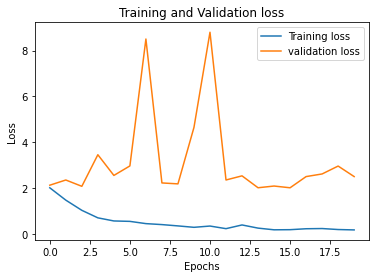

In [17]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

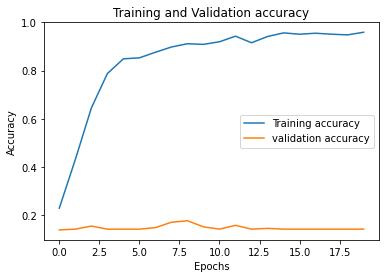

In [18]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()